In [117]:
# set available GPUs

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import warnings
warnings.filterwarnings('ignore')


import scanpy as sc
import matplotlib.pyplot as plt
import os
import pandas as pd



## Load the cross-modality attention score

In [118]:
import scipy.sparse as sp
gene_peak_attention = sp.load_npz('./Results/MultiGATE_gene_peak_attention.npz')
gene_peak_attention


<COOrdinate sparse matrix of dtype 'float32'
	with 147720 stored elements and shape (31270, 31270)>

In [119]:
# load adata1 and adata2
adata1 = sc.read_h5ad(f'../clustering/human_hippData/human_hippResults/human_adata1.h5ad')
adata2 = sc.read_h5ad(f'../clustering/human_hippData/human_hippResults/human_adata2.h5ad')


In [120]:
adata1

AnnData object with n_obs × n_vars = 2500 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'gene_peak_Net', 'hvg', 'log1p', 'wnn_colors'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'

In [121]:
adata2

AnnData object with n_obs × n_vars = 2500 × 28270
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'wnn'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'chrom', 'chromStart', 'chromEnd'
    uns: 'Spatial_Net', 'gene_peak_Net', 'hvg', 'log1p'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'

In [122]:
gene_peak_attention

<COOrdinate sparse matrix of dtype 'float32'
	with 147720 stored elements and shape (31270, 31270)>

In [123]:
gene_peak_attention = gene_peak_attention - sp.diags(gene_peak_attention.diagonal())

# Convert sparse matrix to a DataFrame
# df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)
adata_Vars1 = adata1[:, adata1.var['highly_variable']]
adata_Vars2 = adata2[:, adata2.var['highly_variable']]
df = pd.DataFrame(gene_peak_attention.toarray(), index = adata_Vars1.var.index.tolist() + adata_Vars2.var.index.tolist(),
             columns=adata_Vars1.var.index.tolist() + adata_Vars2.var.index.tolist())

In [124]:
row_sum = df.sum(axis=1)
row_sum


LOC100288069              0.000000
UBE2J2                    0.973740
ACAP3                     0.977629
INTS11                    0.000000
CCNL2                     0.952790
                            ...   
GL000218.1-53309-54212    0.000000
GL000218.1-62719-63633    0.000000
GL000218.1-97012-97847    0.000000
KI270711.1-8063-8911      0.000000
KI270713.1-21531-22440    0.000000
Length: 31270, dtype: float32

In [125]:

col_sum = df.sum(axis=0)
col_sum

LOC100288069              0.000000
UBE2J2                    7.623826
ACAP3                     8.751803
INTS11                    0.000000
CCNL2                     4.956681
                            ...   
GL000218.1-53309-54212    0.000000
GL000218.1-62719-63633    0.000000
GL000218.1-97012-97847    0.000000
KI270711.1-8063-8911      0.000000
KI270713.1-21531-22440    0.000000
Length: 31270, dtype: float32

In [126]:
df = df.loc[df.any(axis=1), df.any(axis=0)]

In [127]:
df = df.loc[(df != 0).any(axis=1), (df != 0).any(axis=0)]

In [128]:
df

,UBE2J2,ACAP3,CCNL2,VWA1,CDK11B,CDK11A,PRKCZ,FAAP20,RER1,TPRG1L,...,chrX-155612331-155613174,chrY-2935610-2936340,chrY-12661636-12662557,chrY-12904507-12905211,chrY-12905335-12905890,chrY-13479683-13480519,chrY-14524353-14525250,chrY-19077311-19078117,chrY-19566899-19567743,chrY-20575219-20576105
UBE2J2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAP3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCNL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VWA1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDK11B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY-13479683-13480519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrY-14524353-14525250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrY-19077311-19078117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrY-19566899-19567743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df = df[df.index.isin(adata1.var.index.tolist())]
df = df[df.columns.intersection(adata2.var_names)]

In [130]:
import pandas as pd
import re     
import numpy as np

In [131]:
var_by = df.index
gtf = './Results/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz'
# '/lustre/project/Stat/s1155077016/Spatial_multi-omics_data/P22/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz' 
# '/lustre/project/Stat/s1155077016/Spatial_multi-omics_data/Human/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz'
gtf_by = "gene_name"
COLUMNS = pd.Index(["seqname", "source", "feature", "start", "end", "score", "strand",
                    "frame", "attribute"])

loaded = pd.read_csv(gtf, sep="\t", header=None, comment="#")
loaded.columns = COLUMNS[:loaded.shape[1]]
loaded = loaded.query("feature == 'gene'")

pattern = re.compile(r'([^\s]+) "([^"]+)";')
splitted = pd.DataFrame.from_records(np.vectorize(lambda x: {
    key: val for key, val in pattern.findall(x)
})(loaded["attribute"]), index=loaded.index)
loaded = loaded.assign(**splitted)
loaded = loaded.sort_values("seqname").drop_duplicates(subset=[gtf_by], keep="last")
bed_df = pd.DataFrame(loaded, copy=True).loc[
            :, ("seqname", "start", "end", "score", "strand")
            ]
bed_df.insert(3, "name", np.repeat(
    ".", len(bed_df)
) if gtf_by is None else loaded[gtf_by])
bed_df["start"] -= 1  # Convert to zero-based
bed_df.columns = ("chrom", "chromStart", "chromEnd", "name", "score", "strand")
for item in bed_df.columns:
    if item in bed_df:
        if item in ("chromStart", "chromEnd"):
            bed_df[item] = bed_df[item].astype(int)
        else:
            bed_df[item] = bed_df[item].astype(str)
    elif item not in ("chrom", "chromStart", "chromEnd"):
        bed_df[item] = "."

gene_df = pd.concat([
    pd.DataFrame(bed_df),
    pd.DataFrame(loaded).drop(columns=COLUMNS)  # Only use the splitted attributes
], axis=1).set_index(gtf_by).reindex(var_by).set_index(df.index)
gene_df = gene_df[[ 'chrom', 'chromStart', 'chromEnd']]

# Assuming your existing dataframe is named 'df'

# Filter out the zero score entries
non_zero_df = df[df > 0.0]
stacked = non_zero_df.stack()
result = stacked.reset_index()
result.columns = ['gene', 'peak', 'score']
result = result.sort_values(by=['gene', 'score'], ascending=[True, False])
result = result.reset_index(drop=True)


merged_df = result.merge(gene_df, left_on='gene', right_index=True, how='left')
chrom_col = merged_df.pop('chrom')
merged_df.insert(1, 'chrom', chrom_col)
chrom_col = merged_df.pop('chromStart')
merged_df.insert(2, 'chromStart', chrom_col)
chrom_col = merged_df.pop('chromEnd')
merged_df.insert(3, 'chromEnd', chrom_col)
merged_df[['peak_chrom', 'peak_start', 'peak_end']] = merged_df['peak'].str.split('-', expand=True)
chrom_col = merged_df.pop('peak_chrom')
merged_df.insert(5, 'peak_chrom', chrom_col)
chrom_col = merged_df.pop('peak_start')
merged_df.insert(6, 'peak_start', chrom_col)
chrom_col = merged_df.pop('peak_end')
merged_df.insert(7, 'peak_end', chrom_col)
# merged_df.to_csv(base_path + 'mouse_gene2link.links_withGeneName_0509_dist150k', index=False, header=False, sep='\t') #_withGeneName_0117
# bed_df = merged_df.drop(['peak', 'gene'], axis=1)
# bed_df.to_csv('mouse_gene2link.links', index=False, header=False, sep='\t')


In [132]:
merged_df

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.136960
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.136960
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.107138
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.107096
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.107080
...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.013255
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.012487
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.012381
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.012345


In [133]:
# standarize the merged_df score column to 0-1
merged_df['score'] = (merged_df['score'] - merged_df['score'].min()) / (merged_df['score'].max() - merged_df['score'].min())
merged_df



,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894
...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148


In [134]:
# /lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/hichipdb/0219redo/output0219/peak_gene_hic_df_alignchipdbintohumandata.csv
peak_gene_hic_df_Alltissue_withtissue=pd.read_csv('/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/hichipdb/0219redo/output0219/peak_gene_hic_df_alignchipdbintohumandata.csv')
peak_gene_hic_df_Alltissue_withtissue

,overlap,tissue,gene,peak,Promoter_chrom,Promoter_chromStart,Promoter_chromEnd,mean,std,3sigma,distance,distance_kb
0,894,Blood,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
1,894,Lymphocyte,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
2,819,Blood,UBE2J2,chr1-827049-827868,chr1,1273884,1275885,746.815574,226.413067,67.576372,446016,446.016
3,720,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
4,187,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
...,...,...,...,...,...,...,...,...,...,...,...,...
205622,844,Lymphocyte,KDM5D,chrY-19566899-19567743,chrY,19744938,19746939,746.815574,226.413067,67.576372,177195,177.195
205623,886,Blood,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205624,886,Embryo,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205625,886,Lung,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167


In [135]:
# split peak_gene_hic_df_Alltissue_withtissue into two dataframes based on the tissue column one is brain and the other is not
brain_hic_df = peak_gene_hic_df_Alltissue_withtissue[peak_gene_hic_df_Alltissue_withtissue['tissue'] == 'Brain']
other_tissue_df = peak_gene_hic_df_Alltissue_withtissue[peak_gene_hic_df_Alltissue_withtissue['tissue'] != 'Brain']

In [136]:
brain_hic_df

,overlap,tissue,gene,peak,Promoter_chrom,Promoter_chromStart,Promoter_chromEnd,mean,std,3sigma,distance,distance_kb
65,420,Brain,ACAP3,chr1-1019200-1020029,chr1,1309608,1311609,746.815574,226.413067,67.576372,289579,289.579
66,409,Brain,ACAP3,chr1-1019200-1020029,chr1,1309608,1311609,746.815574,226.413067,67.576372,289579,289.579
151,883,Brain,UBE2J2,chr1-1115853-1116736,chr1,1273884,1275885,746.815574,226.413067,67.576372,157148,157.148
178,725,Brain,UBE2J2,chr1-1157190-1157915,chr1,1273884,1275885,746.815574,226.413067,67.576372,115969,115.969
179,725,Brain,ACAP3,chr1-1157190-1157915,chr1,1309608,1311609,746.815574,226.413067,67.576372,151693,151.693
...,...,...,...,...,...,...,...,...,...,...,...,...
205475,850,Brain,FLNA,chrX-154490313-154491163,chrX,154374637,154376638,746.815574,226.413067,67.576372,116526,116.526
205513,928,Brain,FLNA,chrX-154526851-154527779,chrX,154374637,154376638,746.815574,226.413067,67.576372,153142,153.142
205526,836,Brain,FLNA,chrX-154534510-154535346,chrX,154374637,154376638,746.815574,226.413067,67.576372,160709,160.709
205561,843,Brain,DKC1,chrX-154805029-154805872,chrX,154760741,154762742,746.815574,226.413067,67.576372,45131,45.131


In [137]:
other_tissue_df

,overlap,tissue,gene,peak,Promoter_chrom,Promoter_chromStart,Promoter_chromEnd,mean,std,3sigma,distance,distance_kb
0,894,Blood,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
1,894,Lymphocyte,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
2,819,Blood,UBE2J2,chr1-827049-827868,chr1,1273884,1275885,746.815574,226.413067,67.576372,446016,446.016
3,720,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
4,187,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
...,...,...,...,...,...,...,...,...,...,...,...,...
205622,844,Lymphocyte,KDM5D,chrY-19566899-19567743,chrY,19744938,19746939,746.815574,226.413067,67.576372,177195,177.195
205623,886,Blood,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205624,886,Embryo,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205625,886,Lung,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167


In [138]:
# filter the other_tissue_df  gene peak pairs not included in brain_hic_df 
barin_pairs=set(zip(brain_hic_df['gene'], brain_hic_df['peak']))
other_tissue_df = other_tissue_df[~other_tissue_df.apply(lambda row: (row['gene'], row['peak']) in barin_pairs, axis=1)]
other_tissue_df

,overlap,tissue,gene,peak,Promoter_chrom,Promoter_chromStart,Promoter_chromEnd,mean,std,3sigma,distance,distance_kb
0,894,Blood,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
1,894,Lymphocyte,ACAP3,chr1-778315-779209,chr1,1309608,1311609,746.815574,226.413067,67.576372,530399,530.399
2,819,Blood,UBE2J2,chr1-827049-827868,chr1,1273884,1275885,746.815574,226.413067,67.576372,446016,446.016
3,720,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
4,187,Blood,ACAP3,chr1-958900-959807,chr1,1309608,1311609,746.815574,226.413067,67.576372,349801,349.801
...,...,...,...,...,...,...,...,...,...,...,...,...
205622,844,Lymphocyte,KDM5D,chrY-19566899-19567743,chrY,19744938,19746939,746.815574,226.413067,67.576372,177195,177.195
205623,886,Blood,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205624,886,Embryo,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167
205625,886,Lung,KDM5D,chrY-20575219-20576105,chrY,19744938,19746939,746.815574,226.413067,67.576372,831167,831.167


In [139]:
# filter the brain_hic_df  gene peak pairs not included in other_tissue_df 
other_tissue_pairs=set(zip(other_tissue_df['gene'], other_tissue_df['peak']))
brain_hic_df = brain_hic_df[~brain_hic_df.apply(lambda row: (row['gene'], row['peak']) in other_tissue_pairs, axis=1)]
brain_hic_df

,overlap,tissue,gene,peak,Promoter_chrom,Promoter_chromStart,Promoter_chromEnd,mean,std,3sigma,distance,distance_kb
65,420,Brain,ACAP3,chr1-1019200-1020029,chr1,1309608,1311609,746.815574,226.413067,67.576372,289579,289.579
66,409,Brain,ACAP3,chr1-1019200-1020029,chr1,1309608,1311609,746.815574,226.413067,67.576372,289579,289.579
151,883,Brain,UBE2J2,chr1-1115853-1116736,chr1,1273884,1275885,746.815574,226.413067,67.576372,157148,157.148
178,725,Brain,UBE2J2,chr1-1157190-1157915,chr1,1273884,1275885,746.815574,226.413067,67.576372,115969,115.969
179,725,Brain,ACAP3,chr1-1157190-1157915,chr1,1309608,1311609,746.815574,226.413067,67.576372,151693,151.693
...,...,...,...,...,...,...,...,...,...,...,...,...
205475,850,Brain,FLNA,chrX-154490313-154491163,chrX,154374637,154376638,746.815574,226.413067,67.576372,116526,116.526
205513,928,Brain,FLNA,chrX-154526851-154527779,chrX,154374637,154376638,746.815574,226.413067,67.576372,153142,153.142
205526,836,Brain,FLNA,chrX-154534510-154535346,chrX,154374637,154376638,746.815574,226.413067,67.576372,160709,160.709
205561,843,Brain,DKC1,chrX-154805029-154805872,chrX,154760741,154762742,746.815574,226.413067,67.576372,45131,45.131


In [140]:
 # get the gene peak pairs from other_tissue_df and save into other_tissue_pairs.csv
other_tissue_pairs=set(zip(other_tissue_df['gene'], other_tissue_df['peak']))
other_tissue_pairs

{('EPN2', 'chr17-18697612-18698477'),
 ('UBXN1', 'chr11-62880644-62881198'),
 ('CA12', 'chr15-63436566-63437472'),
 ('NISCH', 'chr3-51982805-51983711'),
 ('STX12', 'chr1-27568153-27568958'),
 ('PSMD6', 'chr3-64210008-64210823'),
 ('TET1', 'chr10-68406786-68407664'),
 ('RGS12', 'chr4-3955294-3956239'),
 ('PDHX', 'chr11-33257009-33257761'),
 ('AP2A1', 'chr19-50376183-50377107'),
 ('HERC3', 'chr4-87006538-87007422'),
 ('TXNRD1', 'chr12-103956720-103957611'),
 ('ALDH2', 'chr12-112116242-112117156'),
 ('PTOV1', 'chr19-48646147-48647045'),
 ('NAMPT', 'chr7-106659898-106660615'),
 ('FOXJ3', 'chr1-43389481-43390368'),
 ('MAPRE1', 'chr20-33731782-33732672'),
 ('YWHAZ', 'chr8-100663063-100663839'),
 ('MTHFD1', 'chr14-65054474-65055199'),
 ('FAM76A', 'chr1-28505524-28506271'),
 ('NGLY1', 'chr3-23916576-23917474'),
 ('AUP1', 'chr2-74032146-74033022'),
 ('LEPROTL1', 'chr8-29314516-29315374'),
 ('CYTH1', 'chr17-78341541-78342418'),
 ('METAP2', 'chr12-95998632-95999415'),
 ('RPS3', 'chr11-76445522-76

In [141]:
# convert other_tissue_pairs to dataframe and save into other_tissue_pairs.csv
other_tissue_pairs_df=pd.DataFrame(other_tissue_pairs, columns=['gene', 'peak'])
# other_tissue_pairs_df.to_csv(base_path + 'other_tissue_pairs.csv', index=False)
other_tissue_pairs_df

,gene,peak
0,EPN2,chr17-18697612-18698477
1,UBXN1,chr11-62880644-62881198
2,CA12,chr15-63436566-63437472
3,NISCH,chr3-51982805-51983711
4,STX12,chr1-27568153-27568958
...,...,...
43734,NDUFB7,chr19-13731280-13732161
43735,SYF2,chr1-25543183-25544112
43736,SENP2,chr3-184017529-184018298
43737,SLC23A2,chr20-5073076-5073946


In [142]:
brain_tissue_pairs=set(zip(brain_hic_df['gene'], brain_hic_df['peak']))
brain_tissue_pairs_df=pd.DataFrame(brain_tissue_pairs, columns=['gene', 'peak'])
# brain_tissue_pairs_df.to_csv(base_path + 'brain_tissue_pairs.csv', index=False)
brain_tissue_pairs_df 

,gene,peak
0,SYBU,chr8-109644758-109645588
1,FAM107B,chr10-14959145-14960023
2,COPG1,chr3-129053137-129053920
3,PRMT2,chr21-46285828-46286771
4,ZCWPW1,chr7-100132280-100133139
...,...,...
9991,HECTD4,chr12-112382000-112382883
9992,ZFAND2A,chr7-1143985-1144870
9993,NUS1,chr6-117602080-117602950
9994,FTH1,chr11-62123547-62124363


In [143]:
merged_df

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894
...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148


In [144]:
# First create the tissues2 column with default value '0'
merged_df['tissues2'] = '0'

# Create sets of gene-peak pairs for faster lookup
brain_pairs = set(zip(brain_tissue_pairs_df['gene'], brain_tissue_pairs_df['peak']))
other_pairs = set(zip(other_tissue_pairs_df['gene'], other_tissue_pairs_df['peak']))

# Update tissues2 based on presence in brain or other tissue pairs
for idx, row in merged_df.iterrows():
    gene_peak_pair = (row['gene'], row['peak'])
    if gene_peak_pair in brain_pairs:
        merged_df.at[idx, 'tissues2'] = 'brain'
    elif gene_peak_pair in other_pairs:
        merged_df.at[idx, 'tissues2'] = 'others'

# Verify the results
print(merged_df['tissues2'].value_counts())

tissues2
others    43739
brain      9996
0          4490
Name: count, dtype: int64


In [145]:
merged_df

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score,tissues2
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763,0
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763,0
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976,others
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917,others
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894,others
...,...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424,brain
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348,others
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200,others
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148,others


In [146]:
merged_df['peak_start'] = merged_df['peak_start'].astype(int)
merged_df['chromStart'] = merged_df['chromStart'].astype(int)
# calculate the distance between the peak and the gene

In [147]:
# calculate the distance between the peak and the gene
merged_df['distance'] = (merged_df['peak_start'] - merged_df['chromStart']).abs()/1000
merged_df

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score,tissues2,distance
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763,0,47.829
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763,0,50.307
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976,others,380.071
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917,others,215.824
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894,others,118.229
...,...,...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424,brain,266.841
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348,others,139.076
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200,others,1187.017
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148,others,514.752


In [148]:
# filter merged_df remove rows with distance >150kb and tissues2 is 0
merged_df2 = merged_df[~((merged_df['distance'] > 150) & (merged_df['tissues2'] == '0'))]
merged_df2

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score,tissues2,distance
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763,0,47.829
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763,0,50.307
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976,others,380.071
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917,others,215.824
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894,others,118.229
...,...,...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424,brain,266.841
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348,others,139.076
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200,others,1187.017
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148,others,514.752


In [149]:
merged_df2

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score,tissues2,distance
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763,0,47.829
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763,0,50.307
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976,others,380.071
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917,others,215.824
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894,others,118.229
...,...,...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424,brain,266.841
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348,others,139.076
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200,others,1187.017
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148,others,514.752


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import numpy as np
import pandas as pd

# 设置样式
plt.style.use(['science', 'no-latex'])
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [151]:
# 计算每个距离区间的统计信息
merged_df2['distance_category'] = pd.cut(
    merged_df2['distance'],
    bins=[0, 150, 300, 450, 600, 750, 1000, 1250, float('inf')],
    labels=['0-150', '150-300', '300-450', '450-600', 
            '600-750', '750-1000', '1000-1250', '>1250']
)

# 计算统计信息
summary_stats = merged_df2.groupby(['distance_category', 'tissues2'])['score'].agg([
    'mean',
    'median',
    'std',
    'count'
]).reset_index()

# 计算95%置信区间
summary_stats['ci'] = 1.96 * summary_stats['std'] / np.sqrt(summary_stats['count'])

# 设置绘图风格和颜色
plt.style.use(['science', 'no-latex'])
colors = ['#E41A1C', '#377EB8', '#4DAF4A']  # 经典科研配色

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42





In [152]:
# 计算每个距离区间brain和others的差异
for distance_cat in merged_df2['distance_category'].unique():
    brain_scores = merged_df2[(merged_df2['distance_category'] == distance_cat) & 
                            (merged_df2['tissues2'] == 'brain')]['score']
    others_scores = merged_df2[(merged_df2['distance_category'] == distance_cat) & 
                             (merged_df2['tissues2'] == 'others')]['score']
    
    # 计算效应量
    effect_size = (brain_scores.median() - others_scores.median()) / others_scores.std()
    
    print(f"\nDistance category: {distance_cat}")
    print(f"Median difference: {brain_scores.median() - others_scores.median():.3f}")
    print(f"Effect size: {effect_size:.3f}")


Distance category: 0-150
Median difference: -0.006
Effect size: -0.116

Distance category: 300-450
Median difference: 0.045
Effect size: 0.738

Distance category: 150-300
Median difference: 0.033
Effect size: 0.506

Distance category: 450-600
Median difference: 0.046
Effect size: 0.893

Distance category: 600-750
Median difference: 0.040
Effect size: 0.773

Distance category: 750-1000
Median difference: 0.048
Effect size: 1.058

Distance category: >1250
Median difference: 0.064
Effect size: 1.759

Distance category: 1000-1250
Median difference: 0.059
Effect size: 1.490


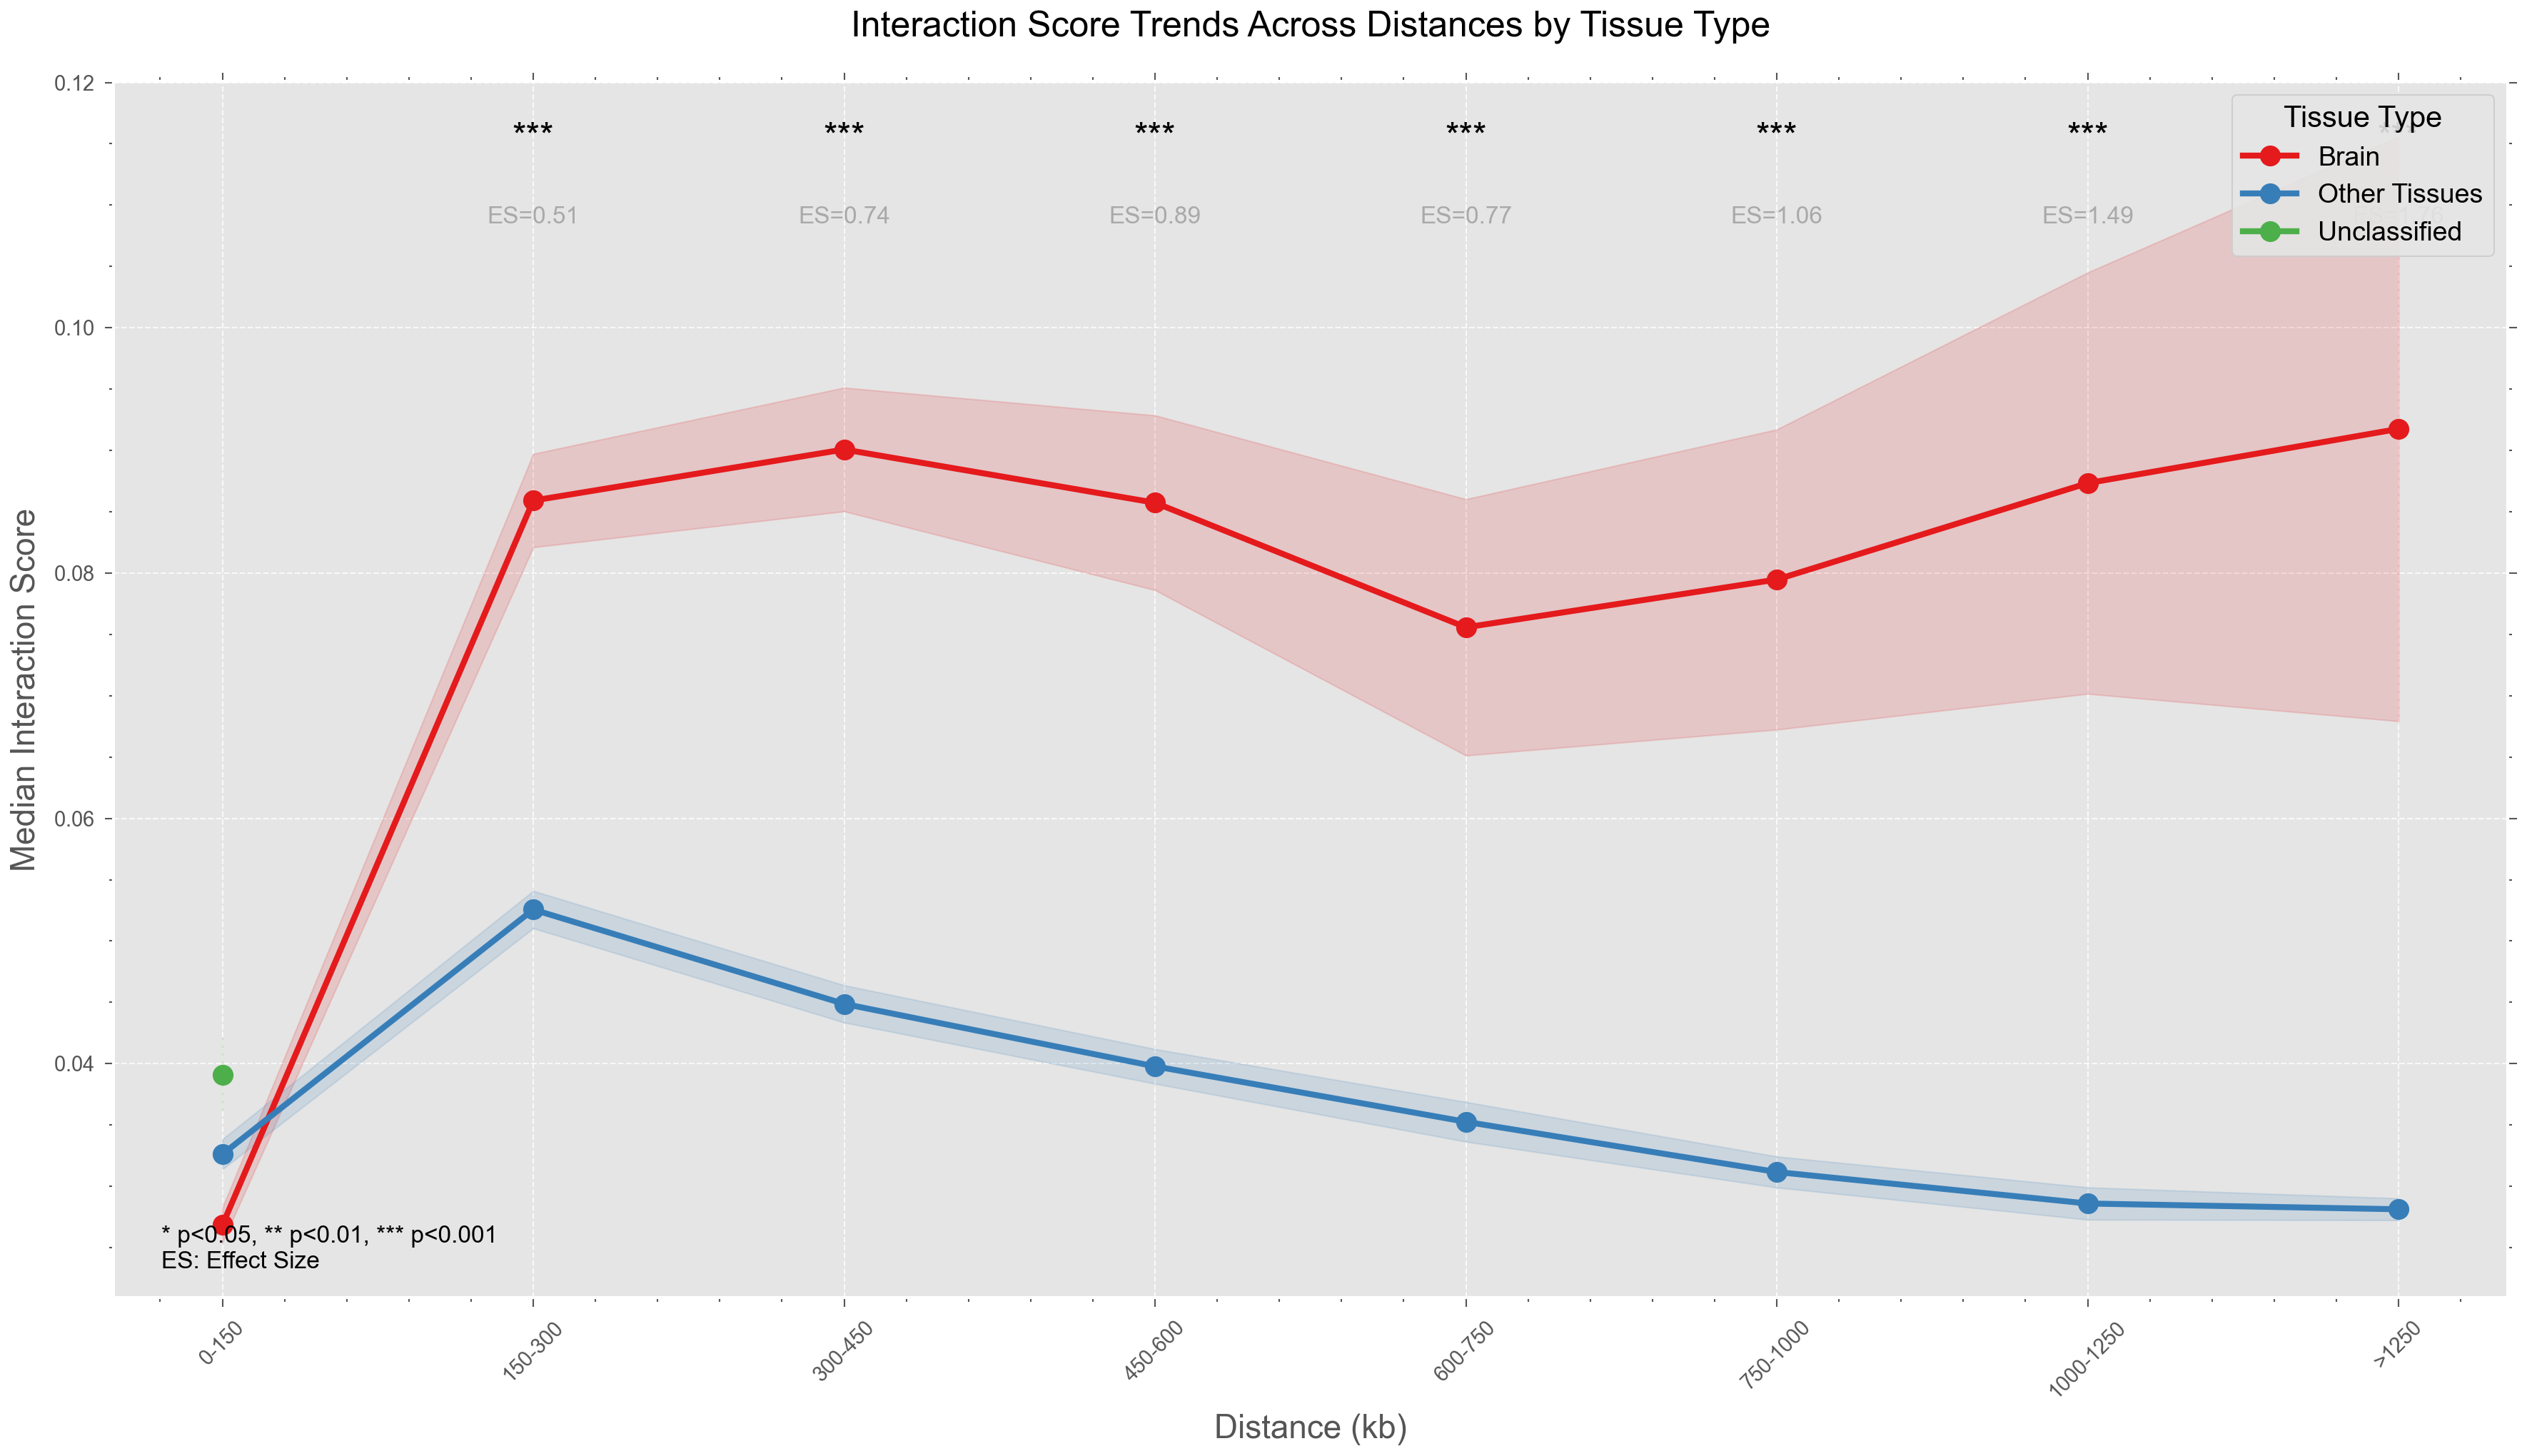

In [153]:

import matplotlib as mpl
import scienceplots
plt.style.use(['nature','no-latex'])
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42  
mpl.rcParams['ps.fonttype'] = 42  
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)


for i, tissue in enumerate(['brain', 'others', '0']):
    tissue_data = summary_stats[summary_stats['tissues2'] == tissue]
    
  
    ax.plot(range(len(tissue_data)), tissue_data['median'], 
            color=colors[i], 
            marker='o',
            markersize=6,
            linewidth=2,
            label=f"{'Brain' if tissue=='brain' else 'Other Tissues' if tissue=='others' else 'Unclassified'}")
    
    # 添加置信区间
    ax.fill_between(range(len(tissue_data)),
                    tissue_data['median'] - tissue_data['ci'],
                    tissue_data['median'] + tissue_data['ci'],
                    color=colors[i],
                    alpha=0.15)


y_max = ax.get_ylim()[1]
statistical_results = {
    '0-150': {'p': 1.00e+00, 'effect': -0.116, 'diff': -0.006},
    '150-300': {'p': 8.04e-99, 'effect': 0.506, 'diff': 0.033},
    '300-450': {'p': 5.07e-134, 'effect': 0.738, 'diff': 0.045},
    '450-600': {'p': 1.58e-81, 'effect': 0.893, 'diff': 0.046},
    '600-750': {'p': 3.62e-42, 'effect': 0.773, 'diff': 0.040},
    '750-1000': {'p': 1.27e-45, 'effect': 1.058, 'diff': 0.048},
    '1000-1250': {'p': 1.36e-25, 'effect': 1.490, 'diff': 0.059},
    '>1250': {'p': 4.25e-20, 'effect': 1.759, 'diff': 0.064}
}


for i, (dist, stats) in enumerate(statistical_results.items()):
    if stats['p'] < 0.05: 
        significance = '***' if stats['p'] < 0.001 else '**' if stats['p'] < 0.01 else '*'
        ax.text(i, y_max * 0.95,
                significance,
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')
        
        
        ax.text(i, y_max * 0.90,
                f'ES={stats["effect"]:.2f}',
                ha='center',
                va='bottom',
                fontsize=8,
                color='darkgray')


plt.xticks(range(8), 
           ['0-150', '150-300', '300-450', '450-600', 
            '600-750', '750-1000', '1000-1250', '>1250'],
           rotation=45)
plt.xlabel('Distance (kb)', fontsize=11)


plt.ylabel('Median Interaction Score', fontsize=11)


plt.title('Interaction Score Trends Across Distances by Tissue Type',
         fontsize=12,
         pad=15)


ax.grid(True, linestyle='--', alpha=0.8)
ax.set_axisbelow(True)


legend = plt.legend(title='Tissue Type',
                   title_fontsize=10,
                   fontsize=9,
                   loc='upper right',
                   frameon=True)
legend.get_frame().set_alpha(0.9)


plt.text(0.02, 0.02,
         '* p<0.05, ** p<0.01, *** p<0.001\nES: Effect Size',
         transform=ax.transAxes,
         fontsize=8,
         va='bottom')



plt.savefig('interaction_score_trends_with_stats_Final.pdf',
            bbox_inches='tight',
            dpi=300,
            format='pdf',
            metadata={'Creator': '', 'Producer': ''},
            transparent=True)

plt.tight_layout()


plt.show()

In [154]:
merged_df2

,gene,chrom,chromStart,chromEnd,peak,peak_chrom,peak_start,peak_end,score,tissues2,distance,distance_category
0,A2M,chr12,9067663,9116229,chr12-9115492-9116400,chr12,9115492,9116400,0.190763,0,47.829,0-150
1,A2M,chr12,9067663,9116229,chr12-9117970-9118894,chr12,9117970,9118894,0.190763,0,50.307,0-150
2,A2M,chr12,9067663,9116229,chr12-9447734-9448649,chr12,9447734,9448649,0.148976,others,380.071,300-450
3,A2M,chr12,9067663,9116229,chr12-9283487-9284383,chr12,9283487,9284383,0.148917,others,215.824,150-300
4,A2M,chr12,9067663,9116229,chr12-8949434-8950301,chr12,8949434,8950301,0.148894,others,118.229,0-150
...,...,...,...,...,...,...,...,...,...,...,...,...
58220,ZZEF1,chr17,4004444,4143020,chr17-3737603-3738381,chr17,3737603,3738381,0.017424,brain,266.841,150-300
58221,ZZEF1,chr17,4004444,4143020,chr17-4143520-4144206,chr17,4143520,4144206,0.016348,others,139.076,0-150
58222,ZZEF1,chr17,4004444,4143020,chr17-5191461-5192356,chr17,5191461,5192356,0.016200,others,1187.017,1000-1250
58223,ZZEF1,chr17,4004444,4143020,chr17-4519196-4519960,chr17,4519196,4519960,0.016148,others,514.752,450-600


In [155]:
# save merged_df2 into a csv file
merged_df2.to_csv('merged_df2.csv', index=False)
